In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, plot_precision_recall_curve

In [85]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/titanic/train.csv'
p_df_raw_train = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [86]:
p_df_raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
p_df_raw_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [88]:
p_df_raw_train.Age = p_df_raw_train.Age.fillna(-1)
p_df_raw_train.Cabin = p_df_raw_train.Cabin.fillna('NA')
p_df_raw_train.Embarked = p_df_raw_train.Embarked.fillna('NA')

## Check class frequencies

In [90]:
y = p_df_raw_train.Survived
sum(y), sum(y)/len(y)*100

(342, 38.38383838383838)

## Transform the data: make every column into number and scale the values of each column

In [91]:
df_y = p_df_raw_train['Survived']
df_X_raw = p_df_raw_train.drop(['Name'], axis=1)

columns=df_X_raw.columns
for f in df_X_raw.columns:
    if df_X_raw[f].dtype == 'object':
        df_X_raw[f] = LabelEncoder().fit_transform(list(df_X_raw[f]))        

### Also try out "power transform" from sklearn.preprocessing

In [92]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_X_raw)
df_X = pd.DataFrame(scaled_df, columns=columns)

In [93]:
class_labels = np.unique(df_y)
class_weights = compute_class_weight('balanced', class_labels, df_y)
class_weights = dict(zip(class_labels, class_weights))

c:\programdata\anaconda3\envs\asigmo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [94]:
class_weights

{0: 0.8114754098360656, 1: 1.3026315789473684}

In [95]:
df_X = df_X.reset_index()

In [96]:
np.any(np.isnan(df_X))

False

In [97]:
np.all(np.isfinite(df_X))

True

In [98]:
df_X.isna().sum()

index          0
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Default parameters

In [99]:
C=1.0
kernel='rbf',
degree=3,
gamma='scale',
coef0=0.0,
shrinking=True,
probability=False,
tol=0.001,
cache_size=200,
class_weight=None,
verbose=False,
max_iter=-1,
decision_function_shape='ovr',
break_ties=False,
random_state=None

In [100]:
clf = svm.SVC(C=1.0, class_weight=class_weights)

In [101]:
clf.fit(df_X, df_y)

SVC(class_weight={0: 0.8114754098360656, 1: 1.3026315789473684})

In [107]:
clf_train_pred = clf.predict(df_X)

In [108]:
auc_train = roc_auc_score(df_y, clf_train_pred)
print('\nAUROC.....', auc_train)


AUROC..... 0.5320918416259227


In [110]:
fpr, tpr, threshold = roc_curve(df_y, clf_train_pred)

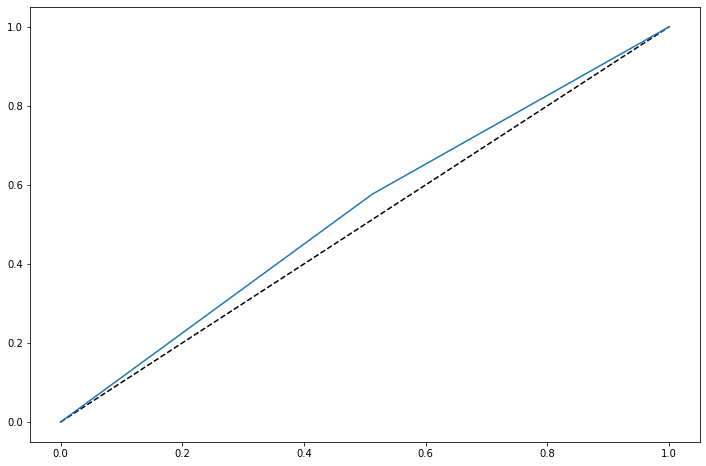

In [113]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)

In [114]:
 print('Accuracy')
print(accuracy_score(df_y, clf_train_pred))
print('Confusion Matrix')
print(confusion_matrix(df_y, clf_train_pred))
print('Confusion Report')
print(classification_report(df_y, clf_train_pred))

Accuracy
0.5218855218855218
Confusion Matrix
[[268 281]
 [145 197]]
Confusion Report
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       549
           1       0.41      0.58      0.48       342

    accuracy                           0.52       891
   macro avg       0.53      0.53      0.52       891
weighted avg       0.56      0.52      0.53       891



### Rpeat the above stats for test data

### saving/loading the model

In [ ]:
joblib.dump(clf, 'SVM_test.pkl')

In [ ]:
clf_pickle = joblib.load('SVM_test.pkl')